# This notebook will take a qp,qc screen generated from StabilityScreen_CS3390.jl and generate corresponding heatmaps 

In [2]:
using SharedArrays
using Distributed
using Random
using JLD
using StatsBase
using Statistics
import PyPlot; const plt = PyPlot;

### Change the line below to load in the correct jld save

In [29]:
d = load("/Volumes/DariusRK/JLD_Saves/nGen_200_nCellType_20_nMediator_15_ri0_0.2_posIntRatio_0.1_at_1_bt_0.1_CS3390_HEATMAP_seed_1586860724.jld")

Dict{String,Any} with 13 entries:
  "BT"     => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0757754 0.0757754 … …
  "CmpEDT" => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0…
  "rintAT" => [0.0 0.0 … 0.0992023 0.0992023; 0.0 0.0 … 0.0992023 0.0992023; … …
  "rintET" => [0.0 0.0 … 0.0828457 0.0828457; 0.0 0.0 … 0.0828457 0.0828457; … …
  "V0DT"   => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 1.0 1.0; … ; 0.0 0.0 … 0.0 0.0; 0.0…
  "r0T"    => [0.10692 0.10692 … 0.10692 0.10692; 0.10692 0.10692 … 0.10692 0.1…
  "NE0D"   => [2.0 2.0 … 2.0 2.0; 2.0 1.0 … 1.0 1.0; … ; 2.0 2.0 … 1.0 1.0; 2.0…
  "CmpBDT" => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0…
  "SiT"    => [12024.5 12024.5 … 12024.5 12024.5; 12024.5 12024.5 … 12024.5 120…
  "AT"     => [0.0 0.0 … 0.527268 0.527268; 0.0 0.0 … 0.527268 0.527268; … ; 0.…
  "params" => Dict{String,Any}("nInitialCell"=>10000.0,"dilTh"=>1.0e10,"tau0"=>…
  "rintBT" => [-0.0 -0.0 … -0.0396402 -0.0396402; -0.0 -0.0 … -0.0396402 -0

In [30]:
NE0D = d["NE0D"];
nm, nc = size(d["AT"])[3:4]

(15, 20)

In [5]:
size(NE0D)
size(d["AT"])

(21, 21, 5, 20, 2500)

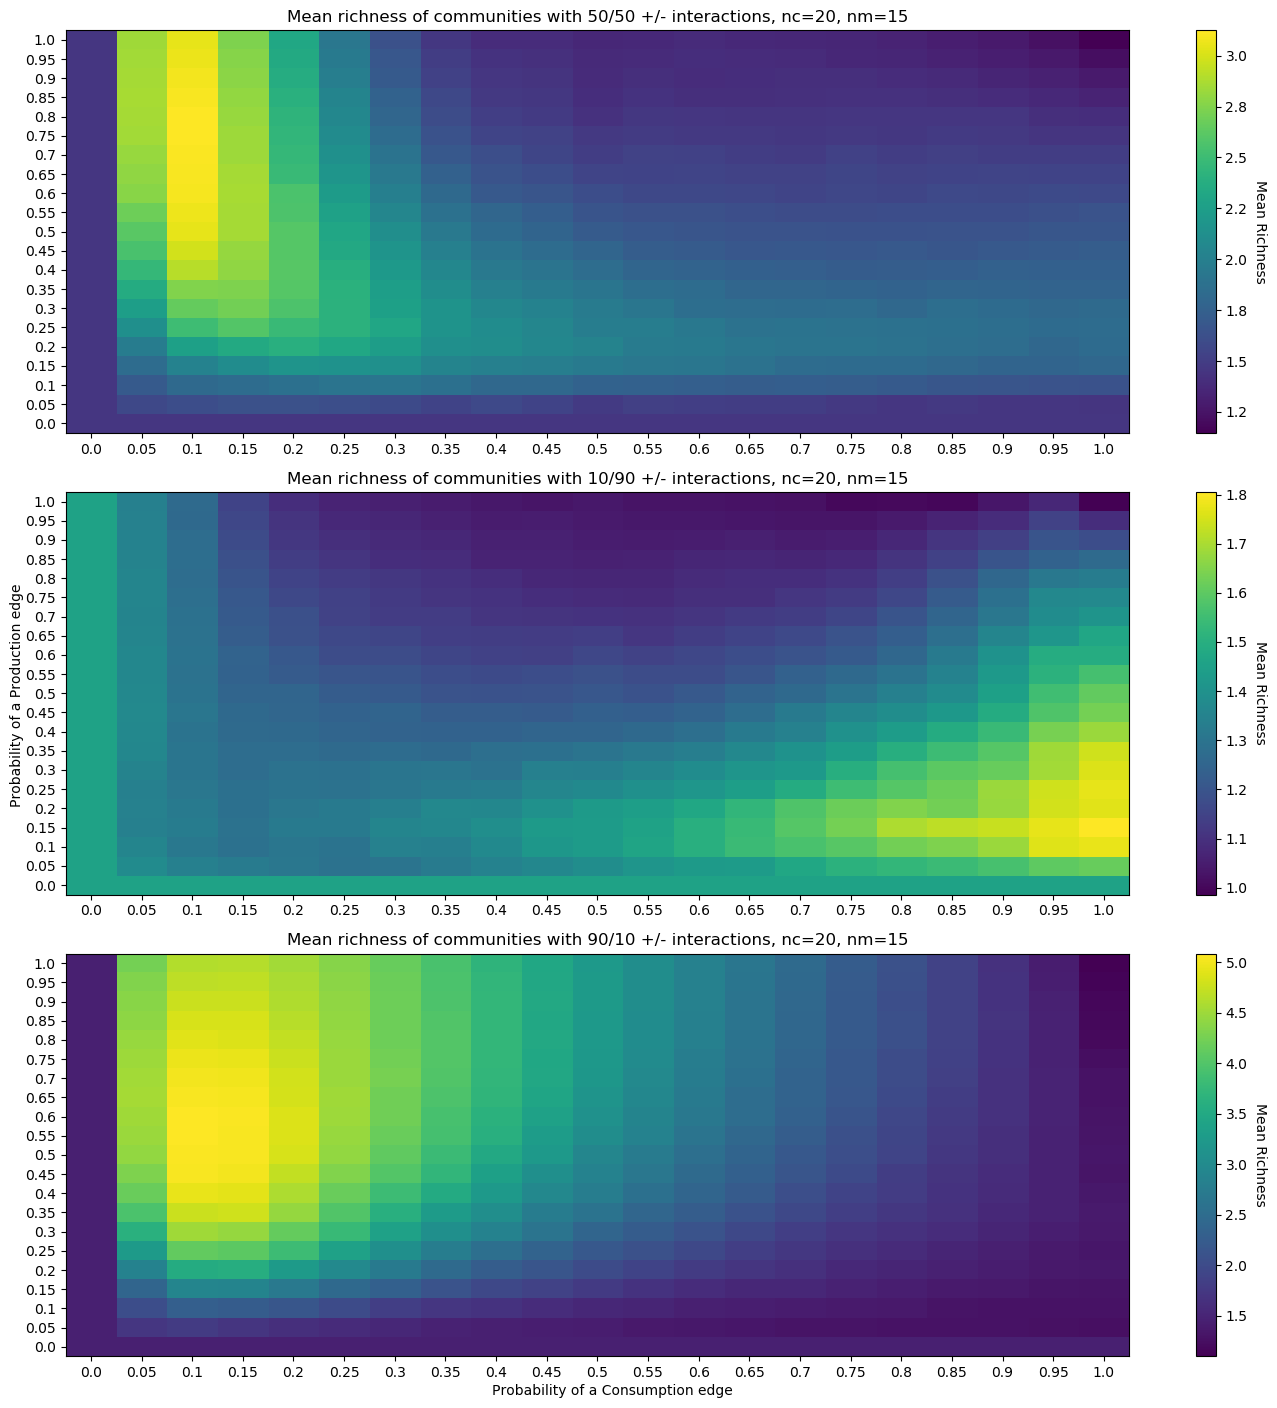

In [31]:
c = size(NE0D, 1)
Ameans = zeros(c,c)
Bmeans = zeros(c,c)
Emeans = zeros(c,c)

Amedians = zeros(c,c)
Bmedians = zeros(c,c)
Emedians = zeros(c,c)

Astd = zeros(c,c)
Bstd = zeros(c,c)
Estd = zeros(c,c)

axisvals = (collect(1:c) .- 1) ./ (c-1)
for qp = 1:c, qc = 1:c
    A = NE0D[qp, qc, 1, :]
    B = NE0D[qp, qc, 2, :]
    E = NE0D[qp, qc, 3, :]
    
    Ameans[qp, qc] = mean(A)
    Bmeans[qp, qc] = mean(B)
    Emeans[qp, qc] = mean(E)
    
    Amedians[qp, qc] = median(A)
    Bmedians[qp, qc] = median(B)
    Emedians[qp, qc] = median(E)
    
    Astd[qp, qc] = std(A)
    Bstd[qp, qc] = std(B)
    Estd[qp, qc] = std(E)
end

fig, (ax, ax2, ax3) = plt.subplots(3, 1)

im = ax.imshow(Ameans, origin="lower", aspect="auto")
cbar1 = ax.figure.colorbar(im, ax=ax, format="%0.1f")
cbar1.ax.set_ylabel("Mean Richness", rotation=-90, va="bottom")
ax.set_xticks(0:c-1)
ax.set_yticks(0:c-1)
ax.set_xticklabels(axisvals)
ax.set_yticklabels(axisvals)
ax.set_title("Mean richness of communities with 50/50 +/- interactions, nc=$nc, nm=$nm")

im2 = ax2.imshow(Bmeans, origin="lower", aspect="auto")
cbar2 = ax2.figure.colorbar(im2, ax=ax2, format="%0.1f")
cbar2.ax.set_ylabel("Mean Richness", rotation=-90, va="bottom")
ax2.set_xticks(0:c-1)
ax2.set_yticks(0:c-1)
ax2.set_xticklabels(axisvals)
ax2.set_yticklabels(axisvals)
ax2.set_title("Mean richness of communities with 10/90 +/- interactions, nc=$nc, nm=$nm")

im3 = ax3.imshow(Emeans, origin="lower", aspect="auto")
cbar3 = ax3.figure.colorbar(im3, ax=ax3, format="%0.1f")
cbar3.ax.set_ylabel("Mean Richness", rotation=-90, va="bottom")
ax3.set_xticks(0:c-1)
ax3.set_yticks(0:c-1)
ax3.set_xticklabels(axisvals)
ax3.set_yticklabels(axisvals)
ax3.set_title("Mean richness of communities with 90/10 +/- interactions, nc=$nc, nm=$nm")

fig.text(.43, 0, "Probability of a Consumption edge", ha="center")
fig.text(0, .5, "Probability of a Production edge", va="center", rotation="vertical")
fig.set_figheight(14)
fig.set_figwidth(14)
fig.tight_layout()
# p1 = heatmap(axisvals,
#         axisvals, Ameans,
#         xlabel="Probability of a Consumption edge", ylabel="Probability of a Production edge",
#         title="Mean richness of communities with 50/50 +/- interactions",
#         )
# p2 = heatmap(axisvals,
#         axisvals, Bmeans,
#         xlabel="Probability of a Consumption edge", ylabel="Probability of a Production edge",
#         title="Mean richness of communities with 10/90 +/- interactions",
#         )

# p3 = heatmap(axisvals,
#         axisvals, Emeans,
#         xlabel="Probability of a Consumption edge", ylabel="Probability of a Production edge",
#         title="Mean richness of communities with 90/10 +/- interactions",
#         )
# plot(p1, p2, p3, layout=l, dpi=100, size=(600,400))

In [32]:
fig.savefig("Fine_Mean_Heatmap_nC_$(nc)_nM_$(nm).png", dpi=300)

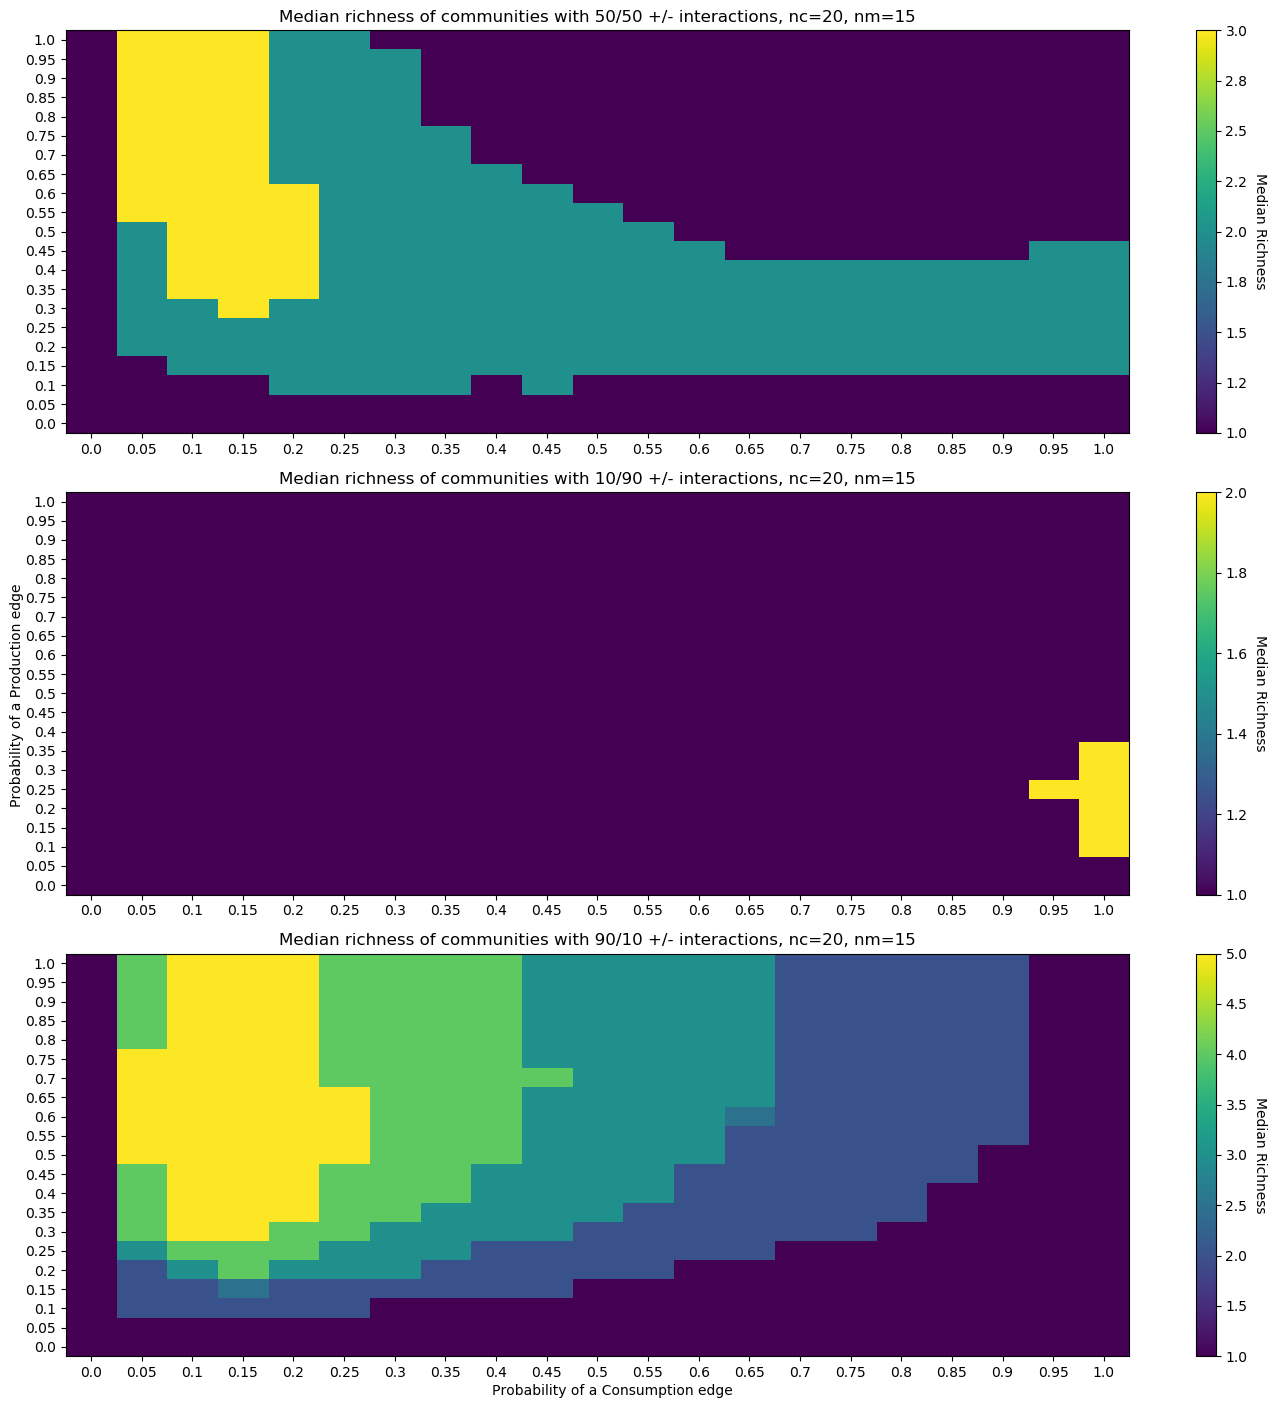

In [33]:
fig, (ax, ax2, ax3) = plt.subplots(3, 1)

im = ax.imshow(Amedians, origin="lower", aspect="auto")
cbar1 = ax.figure.colorbar(im, ax=ax, format="%0.1f")
cbar1.ax.set_ylabel("Median Richness", rotation=-90, va="bottom")
ax.set_xticks(0:c-1)
ax.set_yticks(0:c-1)
ax.set_xticklabels(axisvals)
ax.set_yticklabels(axisvals)
ax.set_title("Median richness of communities with 50/50 +/- interactions, nc=$nc, nm=$nm")

im2 = ax2.imshow(Bmedians, origin="lower", aspect="auto")
cbar2 = ax2.figure.colorbar(im2, ax=ax2, format="%0.1f")
cbar2.ax.set_ylabel("Median Richness", rotation=-90, va="bottom")
ax2.set_xticks(0:c-1)
ax2.set_yticks(0:c-1)
ax2.set_xticklabels(axisvals)
ax2.set_yticklabels(axisvals)
ax2.set_title("Median richness of communities with 10/90 +/- interactions, nc=$nc, nm=$nm")

im3 = ax3.imshow(Emedians, origin="lower", aspect="auto")
cbar3 = ax3.figure.colorbar(im3, ax=ax3, format="%0.1f")
cbar3.ax.set_ylabel("Median Richness", rotation=-90, va="bottom")
ax3.set_xticks(0:c-1)
ax3.set_yticks(0:c-1)
ax3.set_xticklabels(axisvals)
ax3.set_yticklabels(axisvals)
ax3.set_title("Median richness of communities with 90/10 +/- interactions, nc=$nc, nm=$nm")

fig.text(.43, 0, "Probability of a Consumption edge", ha="center")
fig.text(0, .5, "Probability of a Production edge", va="center", rotation="vertical")
fig.set_figheight(14)
fig.set_figwidth(14)
fig.tight_layout()


In [34]:
fig.savefig("Fine_Median_Heatmap_nC_$(nc)_nM_$(nm).png", dpi=300)

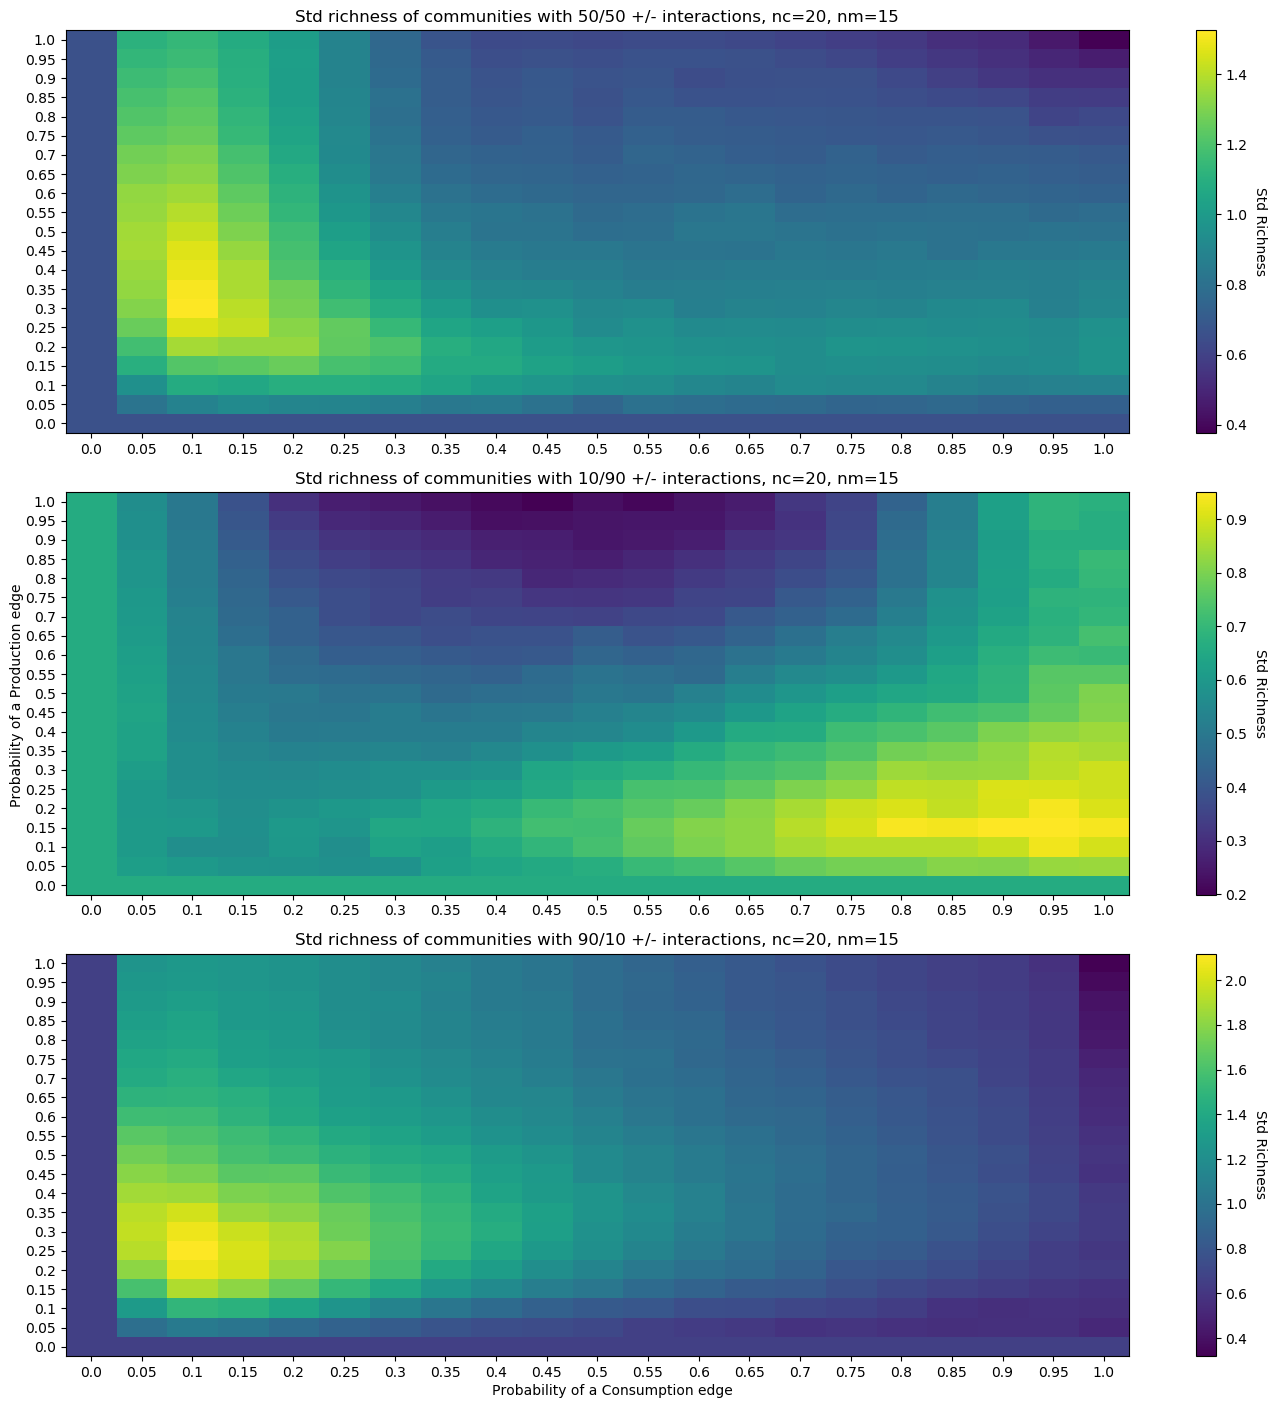

In [35]:
fig, (ax, ax2, ax3) = plt.subplots(3, 1)

im = ax.imshow(Astd, origin="lower", aspect="auto")
cbar1 = ax.figure.colorbar(im, ax=ax, format="%0.1f")
cbar1.ax.set_ylabel("Std Richness", rotation=-90, va="bottom")
ax.set_xticks(0:c-1)
ax.set_yticks(0:c-1)
ax.set_xticklabels(axisvals)
ax.set_yticklabels(axisvals)
ax.set_title("Std richness of communities with 50/50 +/- interactions, nc=$nc, nm=$nm")

im2 = ax2.imshow(Bstd, origin="lower", aspect="auto")
cbar2 = ax2.figure.colorbar(im2, ax=ax2, format="%0.1f")
cbar2.ax.set_ylabel("Std Richness", rotation=-90, va="bottom")
ax2.set_xticks(0:c-1)
ax2.set_yticks(0:c-1)
ax2.set_xticklabels(axisvals)
ax2.set_yticklabels(axisvals)
ax2.set_title("Std richness of communities with 10/90 +/- interactions, nc=$nc, nm=$nm")

im3 = ax3.imshow(Estd, origin="lower", aspect="auto")
cbar3 = ax3.figure.colorbar(im3, ax=ax3, format="%0.1f")
cbar3.ax.set_ylabel("Std Richness", rotation=-90, va="bottom")
ax3.set_xticks(0:c-1)
ax3.set_yticks(0:c-1)
ax3.set_xticklabels(axisvals)
ax3.set_yticklabels(axisvals)
ax3.set_title("Std richness of communities with 90/10 +/- interactions, nc=$nc, nm=$nm")

fig.text(.43, 0, "Probability of a Consumption edge", ha="center")
fig.text(0, .5, "Probability of a Production edge", va="center", rotation="vertical")
fig.set_figheight(14)
fig.set_figwidth(14)
fig.tight_layout()

In [36]:
fig.savefig("Fine_Std_Heatmap_nC_$(nc)_nM_$(nm).png", dpi=300)